In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploratory Data Analysis:

In [3]:
df.groupby(df["Age"].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [4]:
df['Age'].fillna(round(df["Age"].mean()),inplace=True)

In [5]:
assign = {'male':1, 'female':0}
df["Sex"] = df["Sex"].map(assign)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


<Figure size 432x288 with 0 Axes>

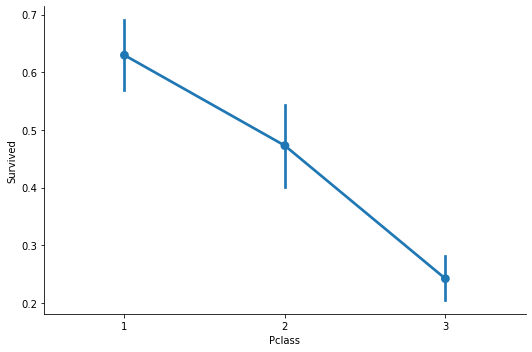

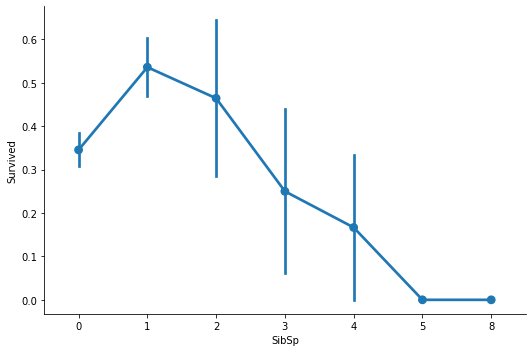

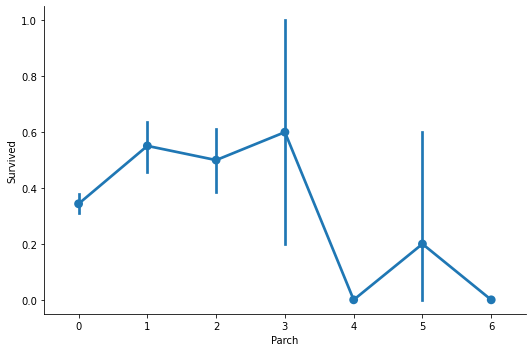

In [6]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=df, kind='point', aspect=1.5)

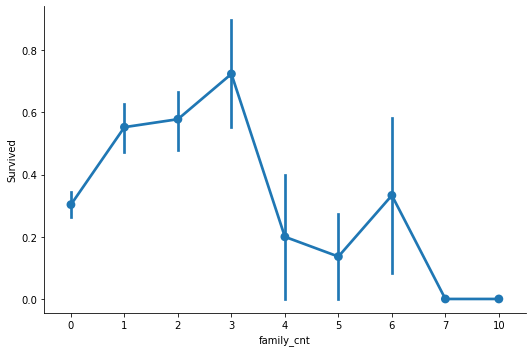

In [7]:
df['family_cnt'] = df['SibSp'] + df['Parch']
sns.catplot(x='family_cnt', y='Survived', data=df, kind='point', aspect=1.5)

In [8]:
df.groupby(df["Cabin"].isnull()).mean()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,family_cnt
Cabin,,,,,,,,,
False,455.401961,0.666667,1.196078,0.524510,35.286373,0.441176,0.436275,76.141504,0.877451
True,443.208151,0.299854,2.639010,0.684134,28.117540,0.547307,0.365357,19.157325,0.912664


In [9]:
df["Cabin_ind"] = np.where(df["Cabin"].isnull(),0,1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_cnt,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0


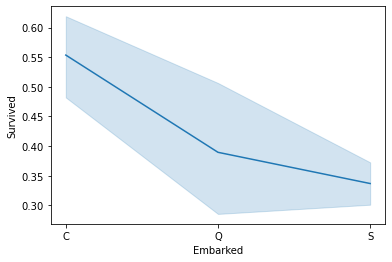

In [10]:
sns.lineplot(x='Embarked', y='Survived', data=df)

In [11]:
pclass = pd.get_dummies(df['Pclass'])
embark = pd.get_dummies(df['Embarked'])
df = pd.concat([df, pclass, embark], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_cnt,Cabin_ind,1,2,3,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,1,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,1,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,0,0,1,0,0,1


In [12]:
df.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked","Pclass","Fare"],axis=1,inplace=True)
df.head()

,Survived,Sex,Age,family_cnt,Cabin_ind,1,2,3,C,Q,S
0,0,1,22.0,1,0,0,0,1,0,0,1
1,1,0,38.0,1,1,1,0,0,1,0,0
2,1,0,26.0,0,0,0,0,1,0,0,1
3,1,0,35.0,1,1,1,0,0,0,0,1
4,0,1,35.0,0,0,0,0,1,0,0,1


In [13]:
df.to_csv("titanic_cleaned.csv",index=None)

Importing the necessary libraries:

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score

In [15]:
df1 = pd.read_csv("titanic_cleaned.csv")
df1.head()

,Survived,Sex,Age,family_cnt,Cabin_ind,1,2,3,C,Q,S
0,0,1,22.0,1,0,0,0,1,0,0,1
1,1,0,38.0,1,1,1,0,0,1,0,0
2,1,0,26.0,0,0,0,0,1,0,0,1
3,1,0,35.0,1,1,1,0,0,0,0,1
4,0,1,35.0,0,0,0,0,1,0,0,1


In [16]:
x = df1.drop(['Survived'],axis=1)
y = df1['Survived']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=65)

Creating a simple model:

In [34]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred = model.predict(x_test)

In [36]:
a = accuracy_score(y_test, y_pred)
print('Accuracy Score:',a*100)

r = recall_score(y_test, y_pred)
print('Recall Score:',r*100)

p = precision_score(y_test, y_pred)
print('Precision Score:',p*100)

f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1*100)

conf = confusion_matrix(y_test, y_pred)
print(conf)

Accuracy Score: 78.77094972067039
Recall Score: 72.3076923076923
Precision Score: 70.1492537313433
F1 Score: 71.2121212121212
[[94 20]
 [18 47]]


Hyperparameter tuning:

In [37]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [38]:
param = {'criterion':['gini','entropy'], 
              'max_depth': range(2,32,1), 'min_samples_leaf': range(1,10,1),
              'min_samples_split': range(2,10,1), 'splitter': ['best','random']}

In [40]:
grid_search = GridSearchCV(estimator=model, param_grid=param, n_jobs=-1, cv=5)
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [41]:
print('Best Parameters: ',grid_search.best_params_)
print('Best Score: ',grid_search.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Best Score:  0.8260561170045821


In [43]:
rand_search = RandomizedSearchCV(estimator=model, param_distributions=param, cv=5, n_jobs=-1, random_state=42)
rand_search.fit(x, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 32),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [44]:
print('Best Parameters: ',rand_search.best_params_)
print('Best Score: ',rand_search.best_score_)

Best Parameters:  {'splitter': 'best', 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_depth': 10, 'criterion': 'entropy'}
Best Score:  0.8148515472977215
